<img alt="logo da Sigmoidal" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Por Rafael Marques** | [Linkedin](https://www.linkedin.com/in/rafamarquesrmb/) | [Github](https://github.com/rafamarquesrmb) | [Medium](https://medium.com/@rafamarquesrmb)

**Curso Data Science na Prática 2.0 da Sigmoidal**

Atividade do Módulo 1 do Curso Data Science Na Prática 2.0 da [Sigmoidal](https://sigmoidal.ai/).

---

# Análise dos Dados do Airbnb - *Oslo - Noruega*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="LogoMarca do Airbnb" width="10%" src="https://cdn.picodi.com/br/files/shop-description/a/airbnb/airbnb-logo.png?v=9292"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Oslo - Noruega, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
#Vamos utilizar a Biblioteca Pandas
import pandas as pd
#Vamos utilizar a Biblioteca MatPlotLib
import matplotlib.pyplot as plt
#Vamos utilizar a Biblioteca SeaBorn
import seaborn as sns
#Vamos utilizar a biblioteca Plotly Graph Objects
import plotly.graph_objects as go

%matplotlib inline

O DataSet utilizado nesse projeto se encontra no link do [Inside Airbnb](http://data.insideairbnb.com/norway/oslo/oslo/2020-12-31/visualisations/listings.csv). Vale ressaltar que dentro do Inside Airbnb, é possível encontrar diversos tipos de dados, inclusive, a respeito do arquivos Listings, existem dois, um resumido e um mais completo (contendo mais de 100 colunas). Para o nosso projeto, utilizamos o arquivos **listings.csv**, ou seja, a versão resumida.


Para evitar qualquer diferença entre o nosso projeto e os dados trabalhados, importamos o csv para o [github](https://raw.githubusercontent.com/rafamarquesrmb/data_science/main/projeto01_analise_de_dados_airbnb_/listings_oslo_norway.csv), garantindo assim que não haja distorções entre o projeto apresentado independente da data em que esteja sendo visualizado.

In [ ]:
# importar o arquivo listings.csv obtido através do InsideAirbnb para um DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/rafamarquesrmb/data_science/main/projeto01_analise_de_dados_airbnb_/listings_oslo_norway.csv')


## Análise dos Dados


**Dicionário de variáveis da Base de Dados (Colunas)**

* `id` - Refere-se ao ID da entrada
* `name` - Nome Anunciado no Airbnb (nome da propriedade)
* `host_id` - ID identificador do proprietário da propriedade
* `host_name` - Nome do proprietário da propriedade 
* `neighbourhood_group` - Grupo de Bairro - OBS: em nossa base de dados, não contém nenhum valor válido.
* `neighbourhood` - Bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de hospedagem que é oferecido
* `price` - preço para hospedar no imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review (a base de dados foi atualizada em 31 de Dezembro de 2020)
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo proprietário/anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar o nosso *dataset* analisando as 5 primeiras entradas e posteriormente as 5 últimas entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,42932,"Charming apartment, Oslo Center, Ro",187463,Cecilie,NaN,Frogner,59.91234,10.72384,Entire home/apt,1999,3,38,2020-01-13,0.43,1,1
1,69964,Lovely flat in Oslo city centre,175633,Kris,NaN,Sagene,59.93898,10.77360,Entire home/apt,427,28,7,2013-05-18,0.06,1,301
2,71725,Central big room - ap with balcony,368229,Reidun,NaN,Gamle Oslo,59.90611,10.78000,Private room,524,4,50,2020-03-12,0.42,1,365
3,77108,Friendly & spacious in uptown Oslo,412523,Gunn Hild,NaN,Frogner,59.92478,10.71649,Entire home/apt,2210,7,15,2019-12-28,0.13,1,358
4,92103,Trendy Urban Downtown Oslo.,496205,Dorte,NaN,Grünerløkka,59.91975,10.75466,Entire home/apt,1261,3,20,2013-08-18,0.17,1,365


In [ ]:
# mostrar as 5 Últimas entradas
df.tail()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3005,47266931,Beautiful studio in the idyllic area Kjelsås.,9023539,Linn,NaN,Nordre Aker,59.96515,10.77913,Entire home/apt,1200,3,0,NaN,NaN,1,37
3006,47280305,Luxury appartement top floor 2 terrasses,903440,Clement,NaN,St. Hanshaugen,59.93184,10.73214,Entire home/apt,3146,5,0,NaN,NaN,1,12
3007,47283330,Koselig leilighet på Holmen,381555587,Mads,NaN,Vestre Aker,59.94797,10.66452,Private room,560,1,0,NaN,NaN,1,59
3008,47303406,"Grünerløkka, in the heart of Oslo city center",89187326,Stian,NaN,Grünerløkka,59.92128,10.76345,Private room,450,1,0,NaN,NaN,1,45
3009,47347872,"Cozy, modern studio in the heart of the city",24183020,Anna,NaN,Sentrum,59.91425,10.75336,Entire home/apt,391,4,0,NaN,NaN,1,0


Apesar de ainda não ser conclusivo, com essa verificação das 5 primeiras e últimas entradas, já podemos observar algumas possibilidades do nosso DataFrame:
*As últimas entradas ainda não receberam `reviews`
*Como consequência do anterior, as ultimas entradas também não possuem dados válidos de `last_review` e de `reviews_per_month`.

Podemos ainda supor que as latitudes devem variar entre 59.9 e 60 e a longitude ficará entre valores de 10.5 e 10.8.

Vale ressaltar que as conclusões acima ainda são completamente superficiais, pois estamos analisando apenas 10 entradas de dados.

### 1. Quantidade de atributos(variáveis) e entradas do Conjunto e Tipos de Variáveis

Nesta etapa, vamos identificar a quantidade de entradas no nosso DataFrame. Além disso vamos verificar quantas colunas há no total, além de identificarmos também os tipos das nossas variáveis.

Vale ressaltar que para esta análise, utilizamos o modelo de dados da versão reumida do Airbnb, no caso, o arquivos listings.csv. O Airbnb disponibiliza também outros modelos, inclusive um mais completo que o utilizado nesta analise, com nome de listings.csv.gz

In [ ]:
# identificar o volume de dados do DataFrame
#Leitura e Impressão do número de "linhas"/entradas
print("Entradas:\t {}".format(df.shape[0]))
#Leitura e impressão do número de Series/Colunas
print("Variáveis:\t {}\n".format(df.shape[1]))

# Impressão dos tipos de variáveis do nosso DataFrame
display(df.dtypes)


Entradas:	 3010
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Fazendo essa análise, chegamos a conclusão que nosso dataFrame possui 3010 linhas/entradas e 16 colunas. Além disso, podemos tambem identificar acima quais os tipos das nossas variáveis.

Além disso já podemos fazer uma separação entre nossas variáveis Numéricas e variáveis Categóricas.

**Variáveis Numéricas:**
* `id`
* `host_id`
* `latitude`
* `longitude`
* `price`
* `minimum_nights` 
* `number_of_reviews`
* `reviews_per_month`
* `calculated_host_listings_count`
* `availability_365`

**Variáveis Categóricas:**
* `name`
* `host_name`
* `neighbourhood_group`
* `neighbourhood`
* `room_type`
* `last_review`

### **2. Porcentagem de valores ausentes no dataset e Tratamento de Dados Inicial**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.182060
last_review                       0.182060
name                              0.000332
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em aproximadamente 18,2% das entradas. Isso significa que temos menos de 1/5 de valores nulos para essas variáveis.
* A variável `name` têm aproximadamente 0,0033% dos valores nulos.
* As demais variáveis apresentaram 0% de valores nulos, ou seja, elas estão completamente preenchidas.

Para nossa análise, a variável `neighbourhood_group` não possuí significância. Vamos remove-la. Além dela, também não há importância sabermos quando foi as ultimas reviews. O nome do proprietário também não possuí importância em nossa analise.

Portanto, vamos remover do nosso dataframe:
* `last_review`
* `neigbourhood_group`
* `host_name`

Posteriormente, realizaremos um tratamento dos dados nulos de `reviews_per_month` e `name` 

In [ ]:
#Removendo (dropping) as colunas que não terão significância para o futuro da nossa exploração de dados
df.drop(['last_review','neighbourhood_group','host_name'], axis=1, inplace=True)

#Verificando as mudanças
df.tail()

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
3005,47266931,Beautiful studio in the idyllic area Kjelsås.,9023539,Nordre Aker,59.96515,10.77913,Entire home/apt,1200,3,0,NaN,1,37
3006,47280305,Luxury appartement top floor 2 terrasses,903440,St. Hanshaugen,59.93184,10.73214,Entire home/apt,3146,5,0,NaN,1,12
3007,47283330,Koselig leilighet på Holmen,381555587,Vestre Aker,59.94797,10.66452,Private room,560,1,0,NaN,1,59
3008,47303406,"Grünerløkka, in the heart of Oslo city center",89187326,Grünerløkka,59.92128,10.76345,Private room,450,1,0,NaN,1,45
3009,47347872,"Cozy, modern studio in the heart of the city",24183020,Sentrum,59.91425,10.75336,Entire home/apt,391,4,0,NaN,1,0


Com a limpeza inicial, nosso Dataframe ficou bem mais limpo, removendo as variáveis que não são interessantes para essa análise.


In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.182060
name                              0.000332
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Agora, ao verificarmos novamente os valores nulos, vamos perceber que as variáveis `name` e `reviews_per_month` continuam com valores nulos. Vamos fazer mais uma modificação. Vamos alterar os valores faltantes de `name` para Not_Insert (que significa não inserido). Já a variável `reviews_per_month`, por se tratar de uma variável numérica, vamos utilizar um método para substituir os valores nulos pelo valor mediana.

In [ ]:
#   Para variáveis categóricas como name
df.fillna({'name':'Not_Insert'}, inplace=True)

In [ ]:
#Calculando a mediana de minimum_nights
df["reviews_per_month"].median()

0.49

In [ ]:
#   Para as variveis numéricas como reviews_per_month
df.fillna({'reviews_per_month':df["reviews_per_month"].median()}, inplace=True)

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

availability_365                  0.0
calculated_host_listings_count    0.0
reviews_per_month                 0.0
number_of_reviews                 0.0
minimum_nights                    0.0
price                             0.0
room_type                         0.0
longitude                         0.0
latitude                          0.0
neighbourhood                     0.0
host_id                           0.0
name                              0.0
id                                0.0
dtype: float64

In [ ]:
df.head()

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,42932,"Charming apartment, Oslo Center, Ro",187463,Frogner,59.91234,10.72384,Entire home/apt,1999,3,38,0.43,1,1
1,69964,Lovely flat in Oslo city centre,175633,Sagene,59.93898,10.77360,Entire home/apt,427,28,7,0.06,1,301
2,71725,Central big room - ap with balcony,368229,Gamle Oslo,59.90611,10.78000,Private room,524,4,50,0.42,1,365
3,77108,Friendly & spacious in uptown Oslo,412523,Frogner,59.92478,10.71649,Entire home/apt,2210,7,15,0.13,1,358
4,92103,Trendy Urban Downtown Oslo.,496205,Grünerløkka,59.91975,10.75466,Entire home/apt,1261,3,20,0.17,1,365


In [ ]:
df.tail()

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
3005,47266931,Beautiful studio in the idyllic area Kjelsås.,9023539,Nordre Aker,59.96515,10.77913,Entire home/apt,1200,3,0,0.49,1,37
3006,47280305,Luxury appartement top floor 2 terrasses,903440,St. Hanshaugen,59.93184,10.73214,Entire home/apt,3146,5,0,0.49,1,12
3007,47283330,Koselig leilighet på Holmen,381555587,Vestre Aker,59.94797,10.66452,Private room,560,1,0,0.49,1,59
3008,47303406,"Grünerløkka, in the heart of Oslo city center",89187326,Grünerløkka,59.92128,10.76345,Private room,450,1,0,0.49,1,45
3009,47347872,"Cozy, modern studio in the heart of the city",24183020,Sentrum,59.91425,10.75336,Entire home/apt,391,4,0,0.49,1,0


### **3. Tipo de distribuição das variáveis** 

Para identificar a distribuição das variáveis numéricas vamos utilizar Histogramas.



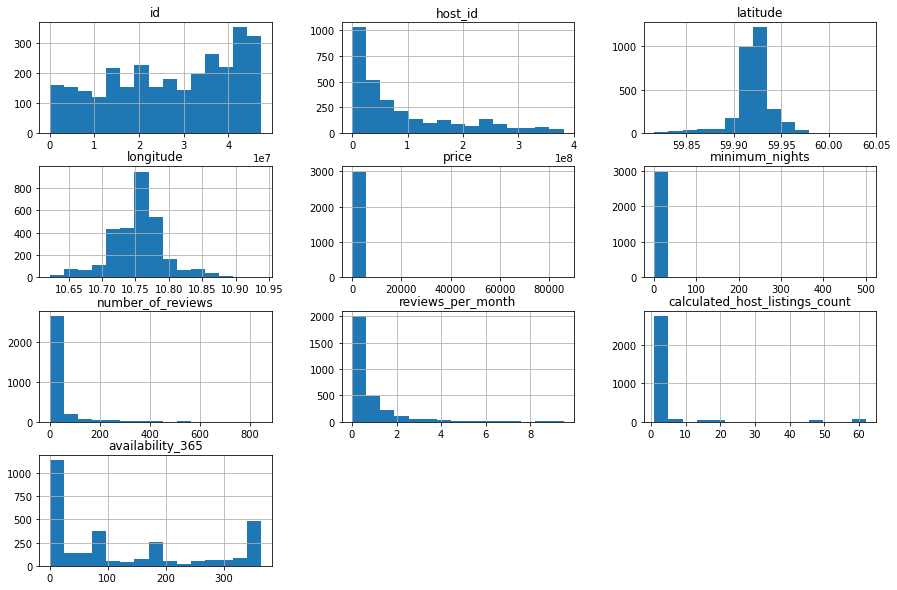

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Quando plotamos um Histograma, além de analisarmos a distribuição das variáveis numéricas, também podemos perceber valores que representam certas **Anomalias**, que chamamos de **Outliers**. 

Um exemplo claro disso está na variável `price`, onde há uma variação entre 0 e acima de 80000. Outro Exemplo é na variável `minumum_nights`, que há alguns pontos bem fora do contexto geral, entre 300 e 400 noites.

Ainda nessa pré analise, vamos verificar a quantidade de valores únicos que aparecem para cada variável.

In [ ]:
# valores únicos
print("\nVALORES ÚNICOS:")
print(df.nunique().sort_values())


VALORES ÚNICOS:
room_type                            4
calculated_host_listings_count      15
neighbourhood                       17
minimum_nights                      38
number_of_reviews                  231
availability_365                   309
reviews_per_month                  388
price                              749
latitude                          2253
host_id                           2487
longitude                         2620
name                              2905
id                                3010
dtype: int64


Com essa análise, já podemos observar que existem **4 Tipos de Hospedagem **(room_type) e **17 Bairros** (neighbourhood) diferentes em Oslo que oferecem Hospedagem pelo Airbnb.


### **4. Lidando com os Outliers**

Analisando a distribuição do histograma, podemos identificar a presença de alguns *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`. Também poderíamos considerar outras variáveis, mas para nosso objetivo, vamos focar apenas nessas.

Os valores não seguem uma distruição adequada. Há uma distorção muito grande que acaba prejudicando na representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# Resumo Estatístico
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000
mean,1148.915947,5.086711,25.840199,0.817023,126.621262
std,2042.174465,18.608474,57.085979,1.049001,136.473223
min,0.000000,1.000000,0.000000,0.010000,0.000000
25%,565.250000,2.000000,1.000000,0.250000,0.000000
50%,819.500000,2.000000,6.000000,0.490000,87.000000
75%,1214.000000,4.000000,23.000000,0.910000,237.500000
max,85800.000000,500.000000,844.000000,9.490000,365.000000


Observando o resultado acima, percebemos que o valor máximo de `price` chega a **85800 NOK** e o valor da média seria **1148.92 NOK**. Além disso, 75% dos valores estão abaixo de 1214 NOK.

Obeserva-se ainda que o valor da variável `minimum_nights` está com uma média de 5.08 noites e 75% estão abaixo de 4 noites. Além disso, o valor maximo chega a 500 noites. Quando analisamos que 75% dos valores estão abaixo de 4 noites, já conseguimos perceber que esses valores possuem outliers que estão dificultando bastante a nossa visualização gráfica.


#### 4.1 Boxplot para price

Sabendo dos problemas apresentados no nosso conjunto de dados, precisamos lidar com eles antes de passarmos para a próxima etapa. Para podermos analisar melhor esses dados, vamos realizar o Método IQR para poder estimar um valor máximo ideal para trabalhar e posteriormente vamos plotar um Boxplot. 
Com essa análise, vamos trabalhar com o valor máximo de **2836 NOK**.


In [ ]:
# calculos IQR de da Variável Price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price

print('IQR da variável price: ', IQR_price, ' NOK')

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price, ' NOK')
print('Limite inferior de price: ', inf_price, ' NOK')

valor_ideal_price_max = sup_price+IQR_price

print('Valor ideal para nosso valor max: ', valor_ideal_price_max, ' NOK')

IQR da variável price:  648.75  NOK
Limite superior de price:  2187.125  NOK
Limite inferior de price:  -407.875  NOK
Valor ideal para nosso valor max:  2835.875  NOK


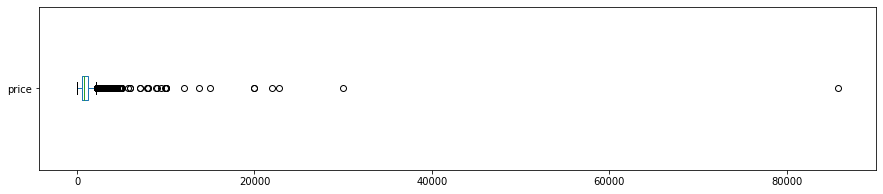


price: valores acima de 2836 NOK (Coroas Norueguesas)
136 entradas
4.52%


In [ ]:
# price
df.price.plot(kind="box", vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 2836  Coroas Norueguesas para price
print("\nprice: valores acima de 2836 NOK (Coroas Norueguesas)")
print("{} entradas".format(len(df[df.price > 2836])))
print("{:.2f}%".format((len(df[df.price > 2836]) / df.shape[0])*100))


#### 4.2 Boxplot para minimum_nights

Para podermos analisar melhor esses dados, vamos plotar um Boxplot. Para podermos analisar melhor esses dados, vamos realizar o Método IQR para poder estimar um valor máximo ideal para trabalhar e posteriormente vamos plotar um Boxplot. 
Com essa análise, vamos trabalhar com o valor máximo de **9 noites**.


In [ ]:
# calculos IQR de da Variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights

print('IQR da variável minimum_nights: ', IQR_minimum_nights, ' NOK')

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights, ' NOK')
print('Limite inferior de minimum_nights: ', inf_minimum_nights, ' NOK')

valor_ideal_minimum_nights_max = sup_minimum_nights+IQR_minimum_nights

print('Valor ideal para nosso valor max: ', valor_ideal_minimum_nights_max, ' NOK')

IQR da variável minimum_nights:  2.0  NOK
Limite superior de minimum_nights:  7.0  NOK
Limite inferior de minimum_nights:  -1.0  NOK
Valor ideal para nosso valor max:  9.0  NOK


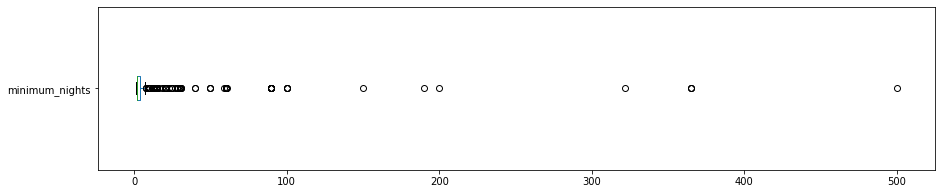

minimum_nights: valores acima de 9:
201 entradas
6.6777%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 9 noites para minimum_nights
print("minimum_nights: valores acima de 9:")
print("{} entradas".format(len(df[df.minimum_nights > 9])))
print("{:.4f}%".format((len(df[df.minimum_nights > 9]) / df.shape[0])*100))

#### 4.3 Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

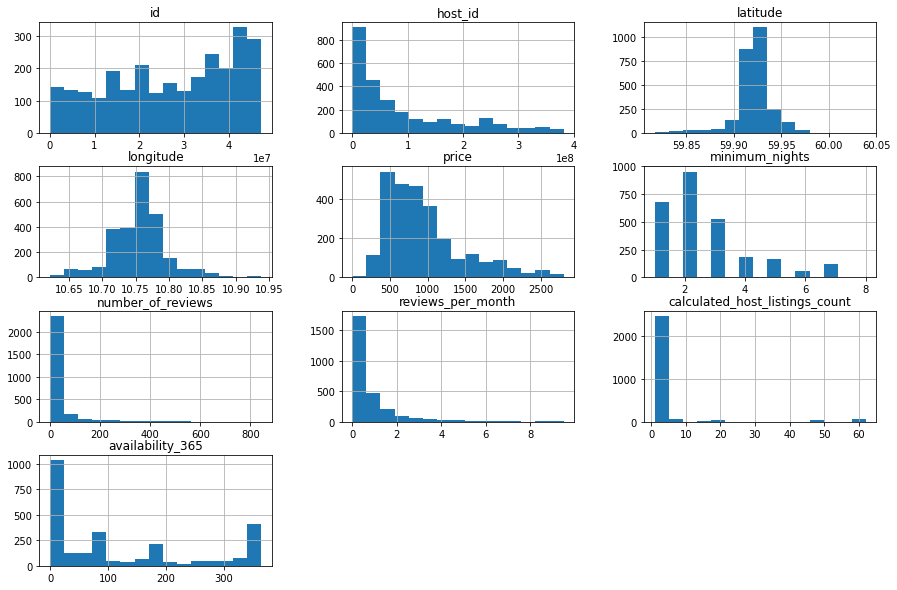

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2836].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 9].index, axis=0, inplace=True)


# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Observe que agora conseguimos ter uma representação gráfica para as variáveis Price e minimun_nights muito mais interessante. Podemos obter mais detalhes e analisar melhor esses histogramas.

Fazendo uma releitura estatística desses dados, agora já temos algo que retrata melhor os valores reais do preço médio e de noites minimas.

#### 4.4 Valores de Média de Preço e de Noites Minimas.

Após realizar a limpeza dos dados, podemos perceber que chegamos a valores diferentes dos encontrados anteriormente.
Vamos usar a função Describe() no dataset original e no dataset "clean"

In [ ]:
print("DataSet Original:")
df[['price', 'minimum_nights']].describe()

DataSet Original:


,price,minimum_nights
count,3010.000000,3010.000000
mean,1148.915947,5.086711
std,2042.174465,18.608474
min,0.000000,1.000000
25%,565.250000,2.000000
50%,819.500000,2.000000
75%,1214.000000,4.000000
max,85800.000000,500.000000


A Média de Preços baseado no nosso DataSet original é de **1148.91 NOK**, e a média de noites minimas é de **5.09 noites**. No DataSet original, foram levados em consideração todas as 3010 entradas.

In [ ]:
print("\n\nDataSet Limpo:")
df_clean[['price', 'minimum_nights']].describe()



DataSet Limpo:


,price,minimum_nights
count,2683.000000,2683.000000
mean,943.769288,2.577339
std,512.571852,1.561169
min,0.000000,1.000000
25%,564.000000,1.000000
50%,800.000000,2.000000
75%,1182.500000,3.000000
max,2800.000000,8.000000


A Média de Preços baseado no nosso DataSet após a limpeza dos dados é de **943.77 NOK**, e a média de noites minimas é de **2.58 noites**. No DataSet limpo, foram levados em consideração 2683 entradas, o que representa **89.14%** das 3010 entradas originais.

### **Q4. Qual a correlação existente entre as variáveis**


Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.131437,-0.139838,-0.176014,0.014030,0.073586
minimum_nights,0.131437,1.000000,-0.144901,-0.185965,0.020836,0.021960
number_of_reviews,-0.139838,-0.144901,1.000000,0.834352,-0.053918,0.031220
reviews_per_month,-0.176014,-0.185965,0.834352,1.000000,0.000562,-0.012895
calculated_host_listings_count,0.014030,0.020836,-0.053918,0.000562,1.000000,0.159494
availability_365,0.073586,0.021960,0.031220,-0.012895,0.159494,1.000000


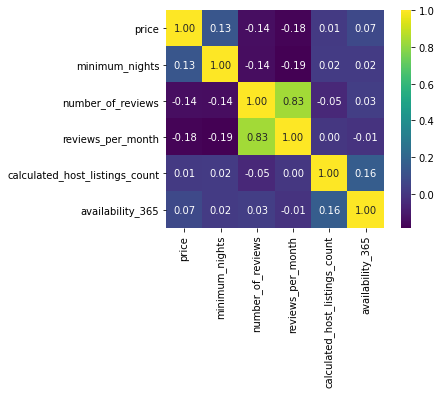

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='viridis', fmt='.2f', square=True, linecolor='white', annot=True);

Através do nosso HeatMap de correlação, podemos perceber que existe um grande correlação entre numéros de reviews e reviews por mês (**83%**), o que faz todo sentido. Não conseguimos identificar outras correlações significativas.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    2031
Private room        624
Shared room          26
Hotel room            2
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.756988
Private room       0.232575
Shared room        0.009691
Hotel room         0.000745
Name: room_type, dtype: float64

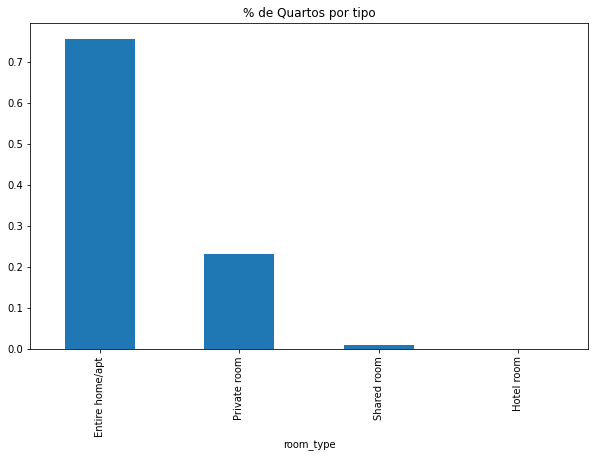

In [ ]:
(df_clean[['room_type', 'id']].groupby('room_type').count() / df_clean.shape[0]).sort_values(by='id', ascending=False).plot.bar(legend=False, figsize=(10,6), title='% de Quartos por tipo');

### **Q6. Qual a localidade mais cara do dataset?**



Ao agruparmos nossas entradas conforme os bairros, podemos calcular os valores médios.

Ao fazer isso, percebemos que os 5 bairros da Capital da Noruega, Oslo, com os maiores valores médios são:
* Sentrum -> 1184 NOK por noite;
* Vestre Aker -> 1123.42 NOK por noite;
* Nordstrand -> 1081.46 NOK por noite;
* Stovner -> 1073.71 NOK por noite;
* Frogner -> 1039.87 NOK por noite;

Porém, esses valores não necessariámente estão realistas. Precisamos identificar o número de entradas para essas cidades, e assim conseguiremos informar se elas estão coerentes.

In [ ]:
# ver preços por bairros, na média
(df_clean[['neighbourhood', 'price']].groupby('neighbourhood').mean()).sort_values(by='price', ascending=False)

,price
neighbourhood,
Sentrum,1184.093333
Vestre Aker,1123.413793
Nordstrand,1081.458333
Stovner,1073.714286
Frogner,1039.870293
Ullern,1029.602564
Nordre Aker,988.542553
St. Hanshaugen,944.839623
Gamle Oslo,916.117783


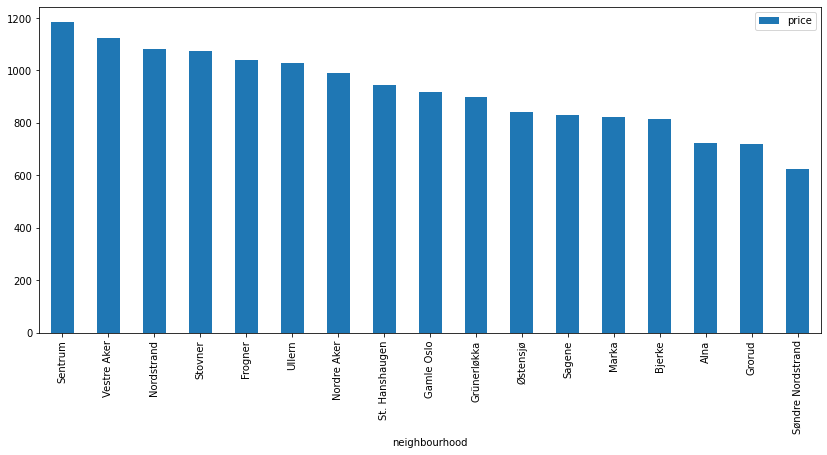

In [ ]:

(df_clean[['neighbourhood', 'price']].groupby('neighbourhood').mean()).sort_values(by='price', ascending=False).plot(
    kind='bar', figsize=(14,6));

Observe que os Bairros Stovner, Marka e Grorud possuem poucas entradas. Portanto, vamos analisa-las melhor.

In [ ]:
df_clean['neighbourhood'].value_counts()

Grünerløkka          568
Frogner              478
Gamle Oslo           433
St. Hanshaugen       318
Sagene               230
Nordstrand            96
Nordre Aker           94
Vestre Aker           87
Ullern                78
Sentrum               75
Østensjø              60
Alna                  47
Søndre Nordstrand     43
Bjerke                41
Grorud                15
Marka                 13
Stovner                7
Name: neighbourhood, dtype: int64

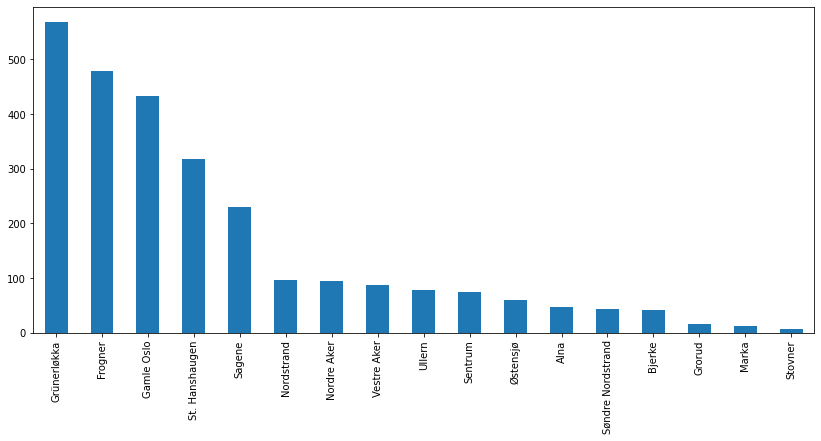

In [ ]:

df_clean['neighbourhood'].value_counts().plot(
    kind='bar', figsize=(14,6));

A região de **Stovner** apresenta apenas 7 entradas, e ao analisarmos melhor, podemos verificar que 75% dos seus valores estão abaixo de 1499.5 NOK e 50%dos seus valores estão abaixo de 790 NOK. Com estes valores não podemos tirar uma conclusão a respeito dos preços dessa região. Portanto, apesar de aparecer entre os 5 bairros mais caros, precisaremos desconsidera-lo.

In [ ]:
print(df_clean[df_clean.neighbourhood == "Stovner"].shape)
df_clean[df_clean.neighbourhood == "Stovner"].price.describe()

(7, 13)


count       7.000000
mean     1073.714286
std       659.842586
min       367.000000
25%       680.000000
50%       790.000000
75%      1499.500000
max      2000.000000
Name: price, dtype: float64

A região de **Marka** apresenta apenas 13 entradas, e ao analisarmos melhor, podemos verificar que 75% dos seus valores estão abaixo de 1100 NOK e 50% dos seus valores estão abaixo de 682 NOK.

In [ ]:
print(df_clean[df_clean.neighbourhood == "Marka"].shape)
df_clean[df_clean.neighbourhood == "Marka"].price.describe()

(13, 13)


count      13.000000
mean      820.846154
std       446.741694
min       400.000000
25%       400.000000
50%       682.000000
75%      1100.000000
max      1529.000000
Name: price, dtype: float64

A região de **Grorud** apresenta apenas 15 entradas, e ao analisarmos melhor, podemos verificar que 75% dos seus valores estão abaixo de 825 NOK e 50% dos seus valores estão abaixo de 650 NOK.

In [ ]:
print(df_clean[df_clean.neighbourhood == "Grorud"].shape)
df_clean[df_clean.neighbourhood == "Grorud"].price.describe()

(15, 13)


count      15.000000
mean      719.133333
std       334.177640
min       342.000000
25%       491.000000
50%       650.000000
75%       825.000000
max      1450.000000
Name: price, dtype: float64

Depois de analisarmos melhor, concluimos que, apesar de Stovner aparecer entre as 5 maiores médias de preço, não podemos afirmar com precisão de esses dados condizem com a realidade, pois o número de entradas é muito pequeno. Levando em consideração apenas os bairros com números de entradas acima de 70, então as regiões mais caras de Oslo são:
* Sentrum -> 1184 NOK por noite;
* Vestre Aker -> 1123.42 NOK por noite;
* Nordstrand -> 1081.46 NOK por noite;
* Frogner -> 1039.87 NOK por noite;
* Ullern -> 1029.60 NOK por noite

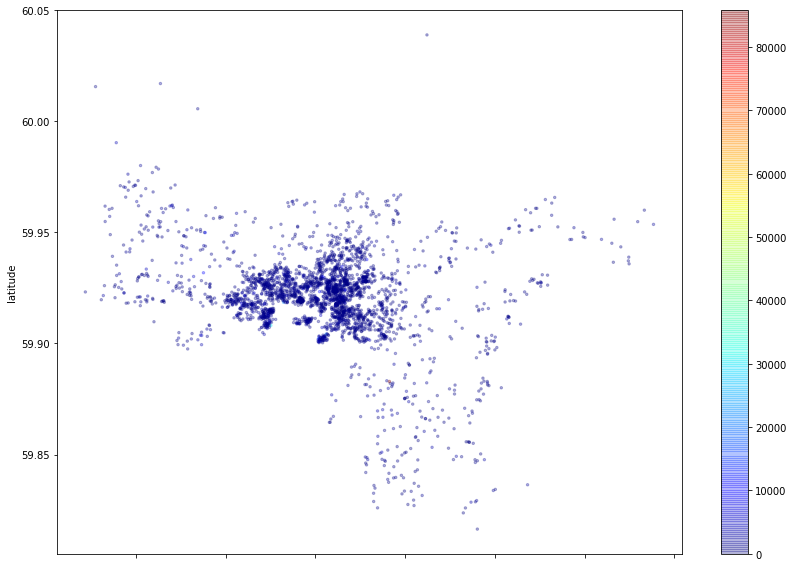

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, c=df['price'], s=6, cmap=plt.get_cmap('jet'), figsize=(14,10));

In [ ]:
#importing plotly
import plotly.express as px
#plotting our map
fig = px.scatter_mapbox(df_clean, lat="latitude", lon="longitude", hover_name="name",color_discrete_sequence=["blue"], zoom=10, height=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Conclusões
